# Introduction to KNN
---
## A Simple Example:

- Suppose you have access to a collection of observations on individuals' height, weight and gender
- The dataset is available in the `height_weight_class.csv` file in the `data` folder
- We can explore the relationship between height, weight and gender, and build a **predictive model**, which can infer the gender of individuals based on their height and weight

In [15]:
# Imports:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [6]:
# Load dataset
filepath = r'./Data/height_weight_class.csv'
df = pd.read_csv(filepath)
display(df.head())
display(df.tail())

,gender,height,weight
0,1,163.205209,74.314273
1,1,163.695584,60.559512
2,1,157.734039,56.253742
3,1,162.208934,96.485144
4,1,175.008617,102.420085


,gender,height,weight
1333,0,186.558587,128.618575
1334,0,180.515432,120.111336
1335,0,181.896026,74.493499
1336,0,176.356741,54.956704
1337,0,184.656273,109.164552


---
### Data Exploration:


The first step of working with any datasets is to **explore** the data to **gain domain knowledge**:
- check the dimensions of the dataset
- check for missing data
- check the distribution of observations by gender - in this dataset the categories are integer encoded - **male = 0** and **female = 1**
- visualise the distribution of observations

(1338, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  1338 non-null   int64  
 1   height  1338 non-null   float64
 2   weight  1338 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 31.5 KB


None

gender
0    676
1    662
Name: count, dtype: int64

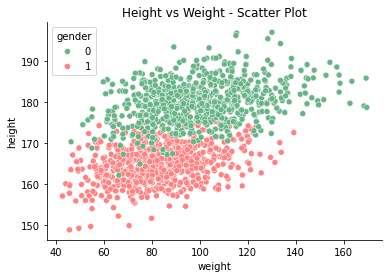

In [10]:
# Check the dimensions of the dataset
display(df.shape)

# Check for missing data
display(df.info())

# Check the distribution of observations by gender category - 0 = male, 1 = female
display(df['gender'].value_counts())

# Lastly, visualise the distribution of observations in the form of a Scatterplot

hue_colours = {0:'#67B587', 1: '#FF8181'}
g = sns.scatterplot(x = 'weight', y = 'height', data = df, hue = 'gender', palette = hue_colours)
g.set_title('Height vs Weight - Scatter Plot')
sns.despine()
plt.show()

---
### Define ML Task:

- Build a model that predicts gender by using information on height and weight
- This is an example of a **Classification Problem** - gender is a categorical variable (which has been encoded numerically into 0s and 1s)
- **Classification** falls under **Supervised ML**, which deals with mapping **inputs to outputs**
- in our case, the **Inputs** for the model are columns `'height'` and `'weight'` - we refer to these as **features**
- The **Output** for the model is the column we want to explain by the features and ultimately predict - this is column `'gender'`
- we also refer to the output as a **label** or **target** column

Use the available data to **train a predictive model**, then use it to make predictions for observations with known height and weight, but unknown gender.

---
## Introduction to K-Nearest Neighbours:
**K-Nearest Neighbours** is one of the **simplest ML algorithms** used for Supervised Machine Learning:
- it is a **'lazy' (non-parametric)** algorithm, used for both Classification and Regression
- In essense, KNN takes a new observation, identifies the <font color=#14F278>**K most similar (nearest) neighbours**</font> to it from the available data, and makes a prediction, based on their labels.
- In the context of KNN, **Similarity** is based on distance (proximity) to the true value
- <font color=#14F278>**K**</font> is a hyperparameter of the algorithm (set in advance) and measures the number of neighbours to:
    - vote on the **majority category** of a new data point (Classification)
    - calculate the >**average value** of a new data point (Regression)
- The **"Neighbourhood"** is calcuated by a **distance function**
- Typically, K is an **odd** number to break ties in votes

Let's visualise how KNN works:

<center>
    <div>
        <img src="./Images/KNN_Method.JPG"/>
    </div>
</center>


Example of **Distance Metrics**, used by the KNN to identify the K-nearest data points, are:
- **Manhattan Distance ($L_{1}$):**
$$
d_{L_{1}}(x_{1},x_{2}) = \Sigma_{n=1}^{N}|x_{1}^{(n)} - x_{2}^{(n)}|
$$
- **Euclidean Distance ($L_{2}$):**
$$
d_{L_{2}}(x_{1},x_{2}) = \Sigma_{n=1}^{N}(x_{1}^{(n)} - x_{2}^{(n)})^2
$$


---
### K-Nearest Neighbours using Python:
To build a **KNN predictive model**, we can use Python's `sklearn` ML Library.
- For Classification problems, import `KNeighborsClassifier` from the `sklearn.neighbors` module
- For Regression problems, import `KNeighborsRegressor` from the `sklearn.neighbors` module

In [11]:
from sklearn.neighbors import KNeighborsClassifier

- Create an instance of the `KNeighborsClassifier()` class - this will become the **model:**
    - `KNeighborsClassifier` has an argument `n_neighbors` with a default value of 5
- Once initialised, **fit** the model to the available data using the `.fit()` method. The method accepts two arguments:
    - a dataframe, containing the **features** (inputs) for the model
    - a series, containing the **label** (output) for the model

In [12]:
# Initialise an instance of a KNN Classifier model
knn = KNeighborsClassifier()

# Fit the model to the available input-output data
knn.fit(df[['height', 'weight']], df['gender'])

KNeighborsClassifier()

- Once the model is fitted to the available data, it is ready to make predictions on unseen data
- To make a prediction, use the `.predict()` method
- The method accepts a single argument - a dataframe, containing the **features** (inputs) for the new data
- Below we will construct a new dataframe with only 4 observations, unseen by the model before
- This time, we only have height and weight information per observation - there is no **label**:

In [13]:
# Construct a new dataframe, unseen by the model
# Aim - make predictions about the gender of each observation in new_df

data = {'height':[185.3425, 155.7853, 168.9043, 192.8832],
        'weight':[92.1123, 56.7865, 62.0043, 102.5543]}
new_df = pd.DataFrame(data)

display(new_df)

,height,weight
0,185.3425,92.1123
1,155.7853,56.7865
2,168.9043,62.0043
3,192.8832,102.5543


In [14]:
# Call the .predict() method to make predictions based on the features
prediction = knn.predict(new_df)
print(prediction)

[0 1 1 0]


# Fit-Predict Workflow
---

We can introduce the **Fit-Predict Workflow** and how to implement it in Python with `sklearn`

In [16]:
# Load dataset
filepath = r'./Data/height_weight_class.csv'
df = pd.read_csv(filepath)
display(df.head())

,gender,height,weight
0,1,163.205209,74.314273
1,1,163.695584,60.559512
2,1,157.734039,56.253742
3,1,162.208934,96.485144
4,1,175.008617,102.420085


---
## Fit-Predict Workflow:
---
### Dataset Preparation for Training a Model:

- When training a Machine Learning model, we are always interested in how well the model performs on previously unseen data:
- TIt is important to have a **'test' dataset** that is separate from the **'train' dataset** that was used to train the model, so that we can evaluate the model performance
- In practice, there may not always be an available 'test' dataset available, so we have to manufacture one manually and **split the overall dataset into 'train' and 'test'** sets.

---
### Splitting Data into Train-Test Sets:

<center>
    <div>
        <img src="./Images/Train_Test_Split_Visual.JPG"/>
    </div>
</center>


- To split a dataset into train and test, use the `train_test_split` function from module `sklearn.model_selection`
- The function accepts argument `test_size`, used to determine the size of the test dataset
- Ensure to dedicate enough data for training as well as testing - usually a **80:20** or **70:30** ratio suffices (larger dataset is used for training)
- The function also accepts an argument `random_state` - assign any number to it (e.g. `123`) to ensure that running the code multiple times produces the same split

In [17]:
# First, split the dataset into X and y - features vs label
# ensure that X is a DataFrame
# ensure that y is a Series

X = df[['height', 'weight']]
y = df['gender']

# Next, split X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

# Check the shape of all 4 objects:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 2)
(268, 2)
(1070,)
(268,)


---
### <font color=#14F278>1.3 Fit-Predict Workflow:</font>

Once the data is split into **train** and **test**, we move on to executing the **Fit-Predict Workflow**. This process consists of 3 steps and is applicable to any Supervised ML problem:
- **Train** - **fit** model on the **train set**
- **Test** - make **predictions** on the **test set**
- **Evaluation** - **evaluate model performance** based on the predictions for the test set

<center>
    <div>
        <img src="./Images/Fit_Predict_Workflow.JPG"/>
    </div>
</center>


- use the `.fit()` method to **train the model** based on `X_train` and `y_train`
- use the `.predict()` method to **predict the labels** for the `X_test`
- **compare** the actual labels in `y_test` to the predicted labels `y_pred` to **evaluate model performance**

In [18]:
# Initialise an instance of a KNN Classifier model
knn = KNeighborsClassifier()

# Fit the model to X_train and y_train
knn.fit(X_train, y_train)

# With the trained model, make predictions on X_test - store in y_pred
y_pred = knn.predict(X_test)

- To evaluate the model performance we can use the **Accuracy Score** which is one of several **Classification Performance Metrics**
- **Accuracy** measures the **proportion** of correct predictions out of all made predictions:

In [19]:
# Compare y_test to y_pred via a Performance Metric
acc_knn = accuracy_score(y_test, y_pred)
print(f'Accuracy Score for KNN: {acc_knn}')

Accuracy Score for KNN: 0.9365671641791045
